In [64]:
from collections import Counter
from pathlib import Path

import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [40]:
train_dir = Path('train')
test_dir = Path('test')

In [41]:
assert train_dir.is_dir()
train_paths = list(p for p in train_dir.glob('*.png'))

In [42]:
assert test_dir.is_dir()
test_paths = list(p for p in test_dir.glob('*.png'))

In [47]:
assert len(train_paths) == len(list(train_dir.iterdir()))
assert len(test_paths) == len(list(test_dir.iterdir()))

dirs contain images only and all images have same png format

In [49]:
print('Train set contains {} images'.format(len(train_paths)))
print('Test set contains {} images'.format(len(test_paths)))

Train set contains 562 images
Test set contains 321 images


In [45]:
train_labels = [p.stem for p in train_paths]

In [53]:
def image_props(path):
    im = Image.open(path)
    return im.size[1], im.size[0], im.mode,

In [54]:
train_props = [image_props(p) for p in train_paths]

In [55]:
heights, widths, modes = zip(*train_props)

In [56]:
[
    Counter(heights),
    Counter(widths),
    Counter(modes),
]

[Counter({150: 562}), Counter({330: 562}), Counter({'RGB': 562})]

all images in train set have the same height, width
and number of channels

dataset consists of color and grayscale images

images have background with the same pattern, sometimes it's colored too

for each image data placed on a smaller rectangle inside an image

also all images seem to have first grid row unobstructed by letters below

see if background could be removed / good mask could be found

In [63]:
path = Path('train/1A2D4.png')
assert path.is_file()
img = Image.open(path)
img = np.array(img)

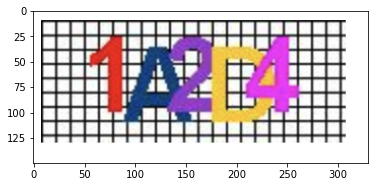

In [65]:
plt.imshow(img)

In [66]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

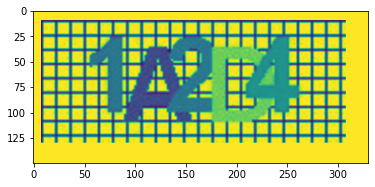

In [67]:
plt.imshow(img)

In [81]:
grad = cv2.Laplacian(img, cv2.CV_64F)

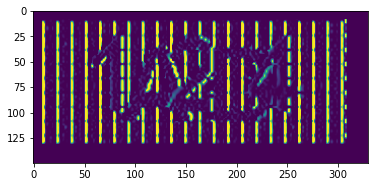

In [93]:
sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, 3)
plt.imshow(sobelx)

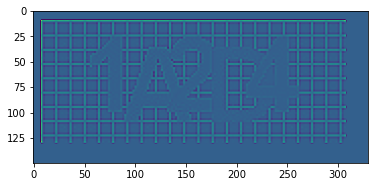

In [83]:
plt.imshow(grad)

In [84]:
grad.min(), grad.max()

(-255.0, 575.0)

(array([[  0., 150.,   0.,   0.,   0.],
        [  0., 150.,   0.,   0.,   0.],
        [  0., 150.,   0.,   0.,   0.],
        ...,
        [  0., 150.,   0.,   0.,   0.],
        [  0., 150.,   0.,   0.,   0.],
        [  0., 150.,   0.,   0.,   0.]]),
 array([-255.,  -89.,   77.,  243.,  409.,  575.]),
 <a list of 330 BarContainer objects>)

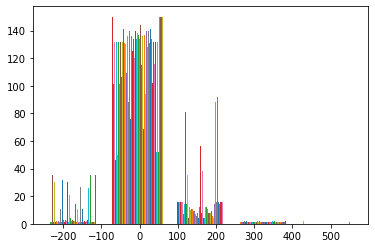

In [87]:
plt.hist(grad, bins=5)

In [ ]:
hist = cv2.calcHist([grad], [0], None, [256], [0, ])

In [79]:
edges = cv2.Canny(img, 200, 300, None, apertureSize=5, L2gradient=None)

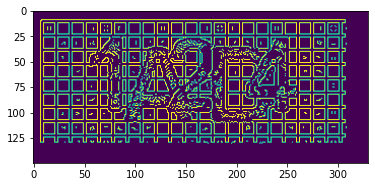

In [80]:
plt.imshow(edges)